In [1]:
# Necessary imports
import numpy as np

In [2]:
# Read the test orderings
import pandas as pd

In [9]:
# Calculate spearman correlation for all pairs of possible orderings\

from scipy.stats import spearmanr

In [3]:
# Open the pkl file
import pickle

In [14]:
!pip install seaborn

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read the pkl file
with open('orderings_test.pkl', 'rb') as f:
    test_orderings = pickle.load(f)

In [8]:
# Sanity check


print(len(test_orderings[0]))
print(len(test_orderings[1]))

2500
2500


In [11]:
results = [[None for i in range(len(test_orderings))] for j in range(len(test_orderings))]

for i in range(len(test_orderings)):
    for j in range(i+1, len(test_orderings)):
        print(i, j)
        acc = 0
        for s in range(len(test_orderings[i])):
            corr, _ = spearmanr(test_orderings[i][s], test_orderings[j][s])
            acc += corr
        print(acc/len(test_orderings[i]))
        results[i][j] = acc/len(test_orderings[i])

0 1
0.44645345995007474
0 2
0.4207128797149678
0 3
0.3701826911551687
0 4
0.3069811145267043
0 5
0.16611194442513333
1 2
0.3897784307517625
1 3
0.350220187241565
1 4
0.2915395350442956
1 5
0.15990018421744645
2 3
0.38552316732700803
2 4
0.30455839486381964
2 5
0.17057605612024374
3 4
0.31356059967812594
3 5
0.1603781726426923
4 5
0.1655626732663077


In [12]:
print(results)

[[None, 0.44645345995007474, 0.4207128797149678, 0.3701826911551687, 0.3069811145267043, 0.16611194442513333], [None, None, 0.3897784307517625, 0.350220187241565, 0.2915395350442956, 0.15990018421744645], [None, None, None, 0.38552316732700803, 0.30455839486381964, 0.17057605612024374], [None, None, None, None, 0.31356059967812594, 0.1603781726426923], [None, None, None, None, None, 0.1655626732663077], [None, None, None, None, None, None]]


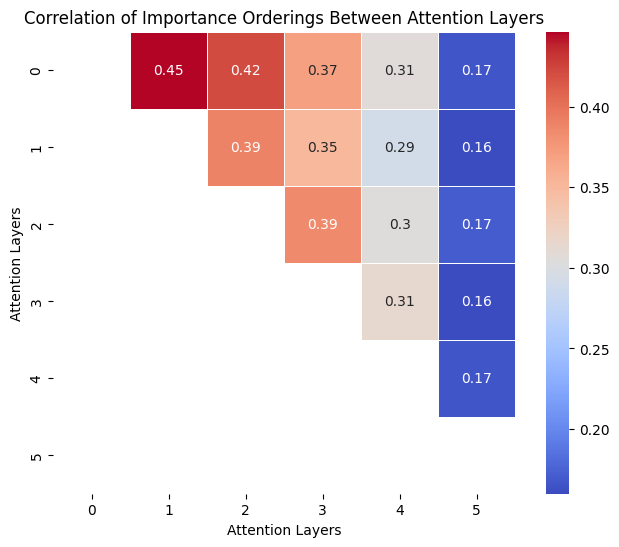

In [19]:
# Visualize the  correlations

results = np.array(results, dtype=np.float32)
plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=0.5, mask=np.isnan(results))
plt.title('Correlation of Importance Orderings Between Attention Layers')
plt.xlabel('Attention Layers')
plt.ylabel('Attention Layers')
plt.show()

In [26]:
def jaccard_similarity(list1, list2):
    return len(set(list1) & set(list2)) / len(set(list1) | set(list2))

In [27]:
# Calculate jaccard similarity between orderings for various pairs of layers and for various ratios of top k tokens

ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results_jaccard = [[[None for i in range(len(test_orderings))] for j in range(len(test_orderings))] for k in range(len(ratios))]

for i in range(len(test_orderings)):
    for j in range(i+1, len(test_orderings)):
        for k in range(len(ratios)):
            acc = 0
            for s in range(len(test_orderings[i])):
                # Calculate jaccard similarity for given ratio
                new_l = int(ratios[k] * len(test_orderings[i][s])) + 1
                acc += jaccard_similarity(test_orderings[i][s][:new_l], test_orderings[j][s][:new_l])
            acc /= len(test_orderings[i])
            results_jaccard[k][i][j] = acc

0.1
[[       nan 0.40501824 0.37971535 0.31183484 0.2766666  0.3045449 ]
 [       nan        nan 0.47868153 0.36821142 0.32011256 0.3168256 ]
 [       nan        nan        nan 0.48842832 0.40733564 0.38827762]
 [       nan        nan        nan        nan 0.4775831  0.35073468]
 [       nan        nan        nan        nan        nan 0.32951382]
 [       nan        nan        nan        nan        nan        nan]]


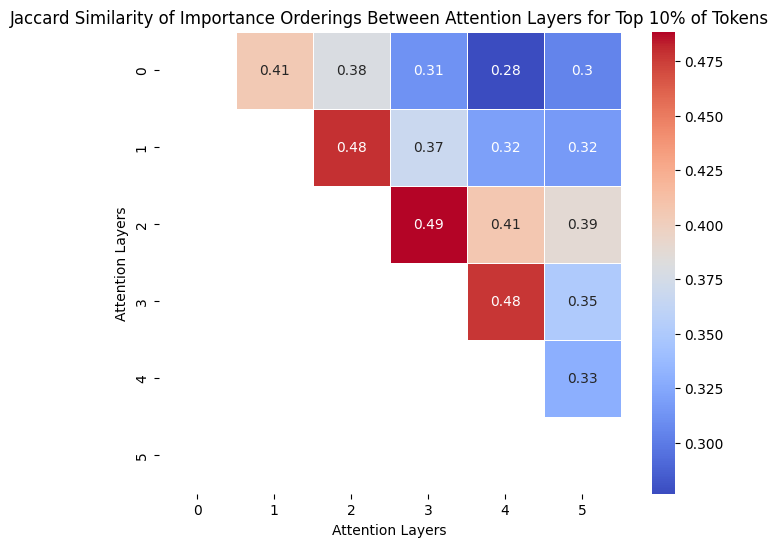

0.2
[[       nan 0.4371593  0.39700866 0.33384204 0.2761853  0.35318112]
 [       nan        nan 0.47915095 0.36832824 0.31219488 0.31818515]
 [       nan        nan        nan 0.5049932  0.4230505  0.42841485]
 [       nan        nan        nan        nan 0.5033769  0.3633222 ]
 [       nan        nan        nan        nan        nan 0.32808813]
 [       nan        nan        nan        nan        nan        nan]]


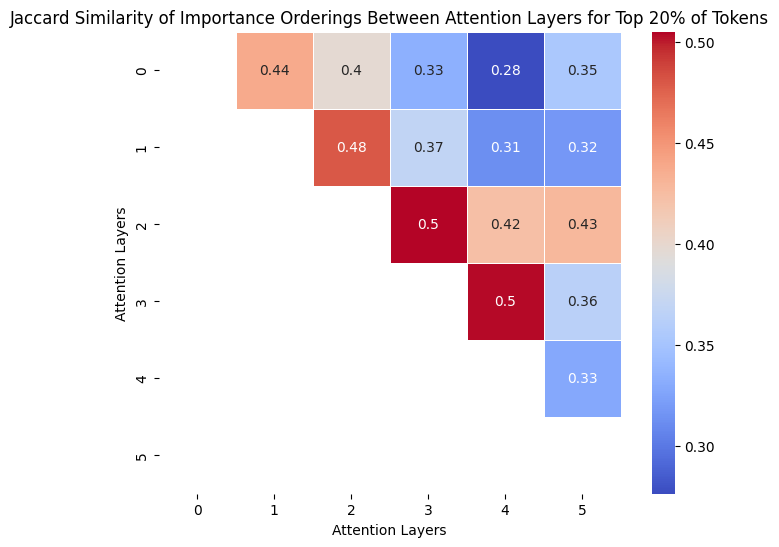

0.3
[[       nan 0.5083029  0.42722645 0.3863521  0.30413246 0.37417954]
 [       nan        nan 0.5144823  0.42522594 0.3624387  0.35706687]
 [       nan        nan        nan 0.5400483  0.43602464 0.43466663]
 [       nan        nan        nan        nan 0.5104136  0.36795443]
 [       nan        nan        nan        nan        nan 0.32182676]
 [       nan        nan        nan        nan        nan        nan]]


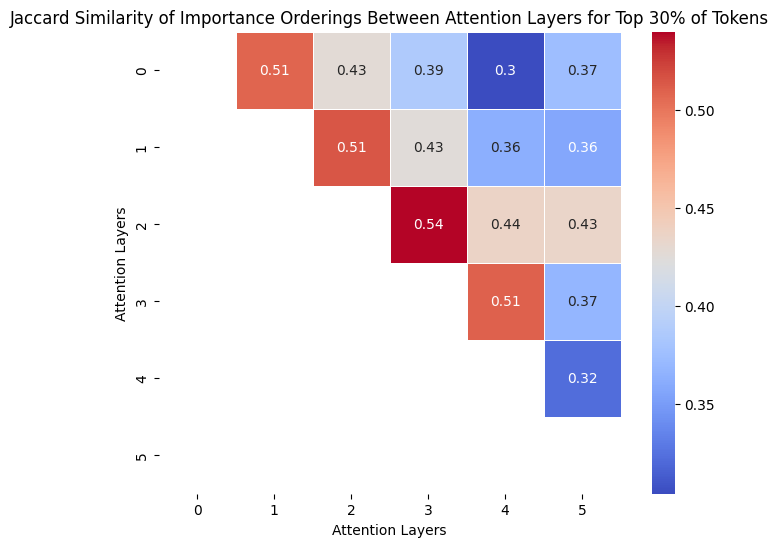

0.4
[[       nan 0.57948226 0.4769006  0.4523411  0.36480686 0.40236226]
 [       nan        nan 0.5635521  0.4859281  0.42069644 0.40892828]
 [       nan        nan        nan 0.59839433 0.485452   0.45956522]
 [       nan        nan        nan        nan 0.5441417  0.40334123]
 [       nan        nan        nan        nan        nan 0.35306934]
 [       nan        nan        nan        nan        nan        nan]]


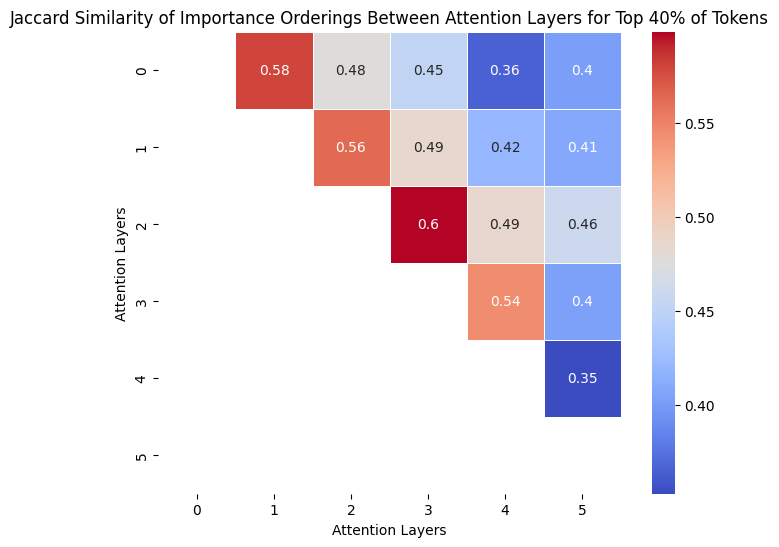

0.5
[[       nan 0.63167393 0.5460531  0.52010345 0.43510696 0.45746955]
 [       nan        nan 0.6258896  0.5456222  0.48897317 0.46960875]
 [       nan        nan        nan 0.6536385  0.56517905 0.5097944 ]
 [       nan        nan        nan        nan 0.59109455 0.47180507]
 [       nan        nan        nan        nan        nan 0.41494244]
 [       nan        nan        nan        nan        nan        nan]]


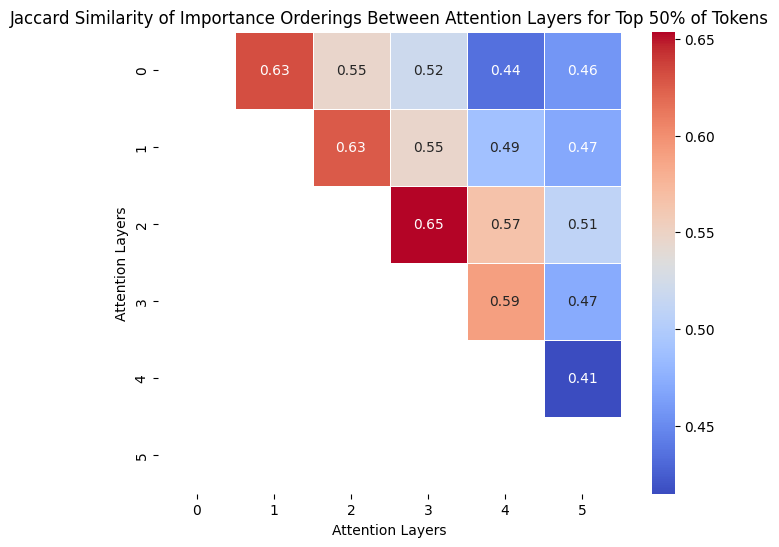

0.6
[[       nan 0.6903087  0.6199911  0.59085524 0.5179755  0.52862436]
 [       nan        nan 0.6926108  0.61540306 0.57079357 0.5422402 ]
 [       nan        nan        nan 0.7061683  0.6361456  0.5710949 ]
 [       nan        nan        nan        nan 0.64364487 0.5535951 ]
 [       nan        nan        nan        nan        nan 0.49966872]
 [       nan        nan        nan        nan        nan        nan]]


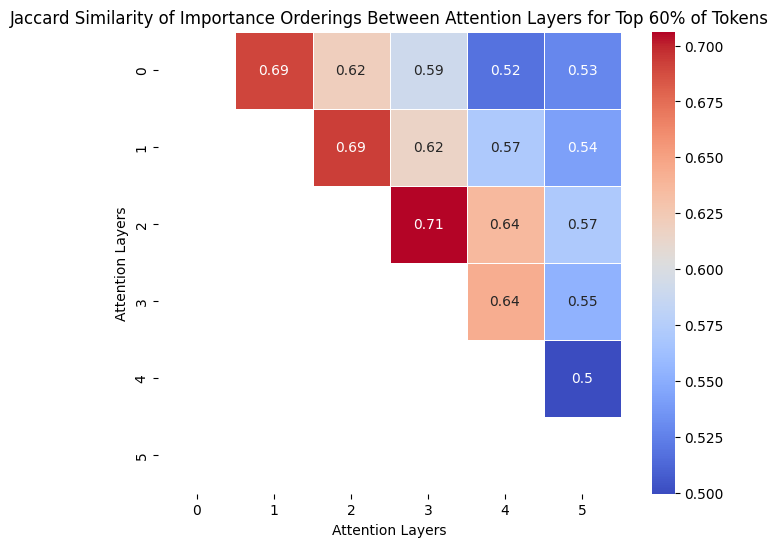

0.7
[[       nan 0.7557141  0.6993901  0.6782279  0.6126652  0.6154431 ]
 [       nan        nan 0.765893   0.70273507 0.6564983  0.62730604]
 [       nan        nan        nan 0.7674075  0.70400757 0.6482859 ]
 [       nan        nan        nan        nan 0.711131   0.64473796]
 [       nan        nan        nan        nan        nan 0.6026358 ]
 [       nan        nan        nan        nan        nan        nan]]


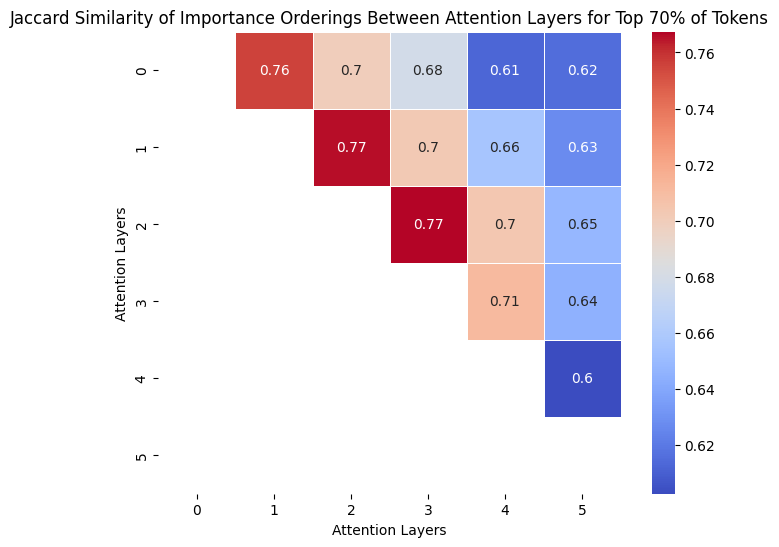

0.8
[[       nan 0.826522   0.789704   0.7869949  0.7351392  0.72977793]
 [       nan        nan 0.84181446 0.8051005  0.7555112  0.73554987]
 [       nan        nan        nan 0.8426606  0.7839869  0.74710804]
 [       nan        nan        nan        nan 0.7969554  0.7541689 ]
 [       nan        nan        nan        nan        nan 0.7272485 ]
 [       nan        nan        nan        nan        nan        nan]]


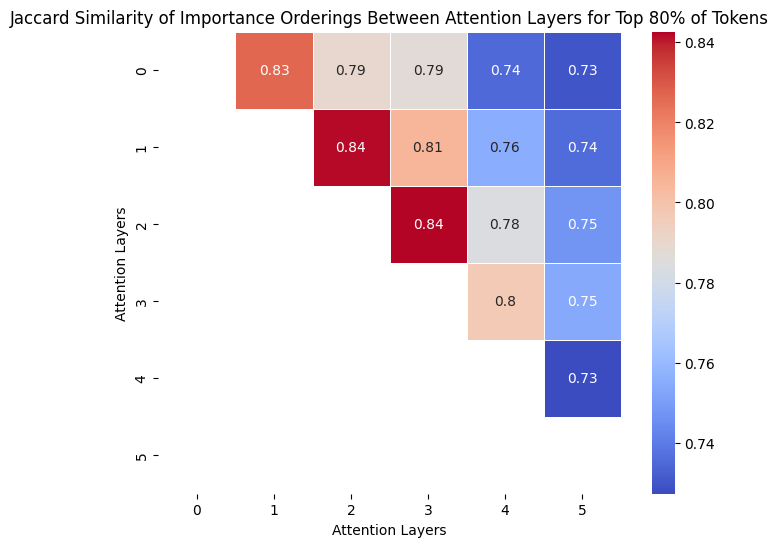

0.9
[[       nan 0.9218887  0.9065313  0.9074267  0.8766958  0.86291623]
 [       nan        nan 0.9217762  0.91568553 0.8847298  0.86806005]
 [       nan        nan        nan 0.9326962  0.89743686 0.8709554 ]
 [       nan        nan        nan        nan 0.90233886 0.8775986 ]
 [       nan        nan        nan        nan        nan 0.86614966]
 [       nan        nan        nan        nan        nan        nan]]


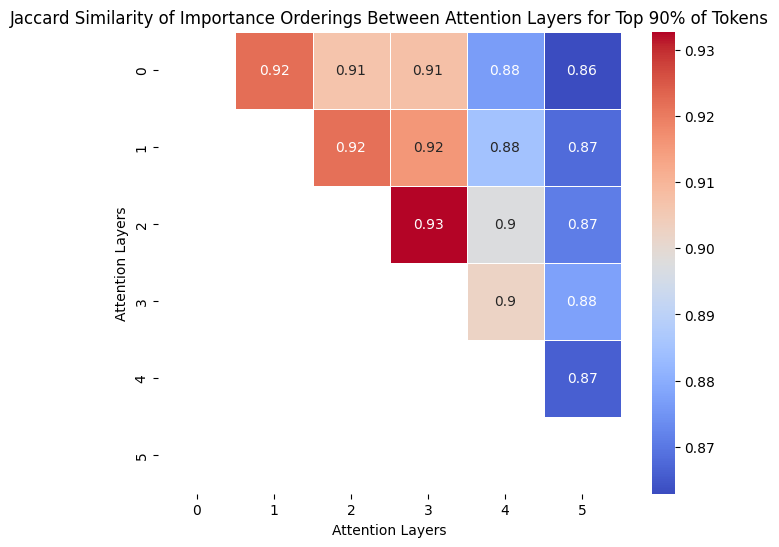

In [30]:
for i in range(len(ratios)):
    print(ratios[i])
    print(results_jaccard[i])
    # Visualizie
    results_jaccard[i] = np.array(results_jaccard[i], dtype=np.float32)
    plt.figure(figsize=(8, 6))
    sns.heatmap(results_jaccard[i], annot=True, cmap='coolwarm', cbar=True, square=True, linewidths=0.5, mask=np.isnan(results_jaccard[i]))
    plt.title('Jaccard Similarity of Importance Orderings Between Attention Layers for Top ' + str(int(ratios[i] * 100)) + '% of Tokens')
    plt.xlabel('Attention Layers')
    plt.ylabel('Attention Layers')
    plt.show()
